In [30]:
import numpy as np
import pandas as pd
import requests

In [31]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [32]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4265,ham,The greatest test of courage on earth is to be...,NaN,NaN,NaN
570,ham,Yar lor wait 4 my mum 2 finish sch then have l...,NaN,NaN,NaN
2133,ham,Spoke with uncle john today. He strongly feels...,NaN,NaN,NaN
2633,ham,That's what I love to hear :V see you sundayis...,NaN,NaN,NaN
2973,ham,"I'll text carlos and let you know, hang on",NaN,NaN,NaN


In [36]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [41]:
#droping last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [43]:
df.sample(5)

,v1,v2
3004,ham,Ew are you one of them?
3795,ham,They have a thread on the wishlist section of ...
5195,ham,Darren was saying dat if u meeting da ge den w...
1415,ham,Jay is snickering and tells me that x is total...
3768,ham,Was gr8 to see that message. So when r u leavi...


In [45]:
# renaming columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
993,ham,The Xmas story is peace.. The Xmas msg is love...
991,ham,Hi im having the most relaxing time ever! we h...
3628,ham,Should I head straight there or what
2499,ham,Yup i've finished c Ì_ there...
2334,ham,Do you like Italian food?


In [47]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [49]:
df['target'] = encoder.fit_transform(df['target'])

In [51]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [55]:
#checking duplicating
df.duplicated().sum()

403

In [57]:
#remove duplicate
df = df.drop_duplicates(keep='first')

In [59]:
df.duplicated().sum()

0

In [61]:
df.shape

(5169, 2)

# 2. EDA

In [64]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [68]:
import matplotlib.pyplot as plt

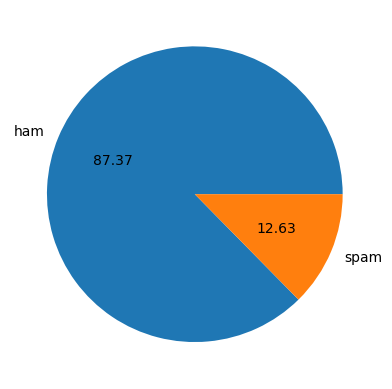

In [69]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [70]:
# Data is imbalanced :(


In [71]:
import nltk

In [76]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
df['num_characters'] = df['text'].apply(len)

In [80]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [82]:
# Fetching number of words

In [84]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [86]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [88]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [90]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [92]:
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [94]:

#ham
df[df['target'] == 0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [96]:
#Spam
df[df['target'] == 1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [98]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

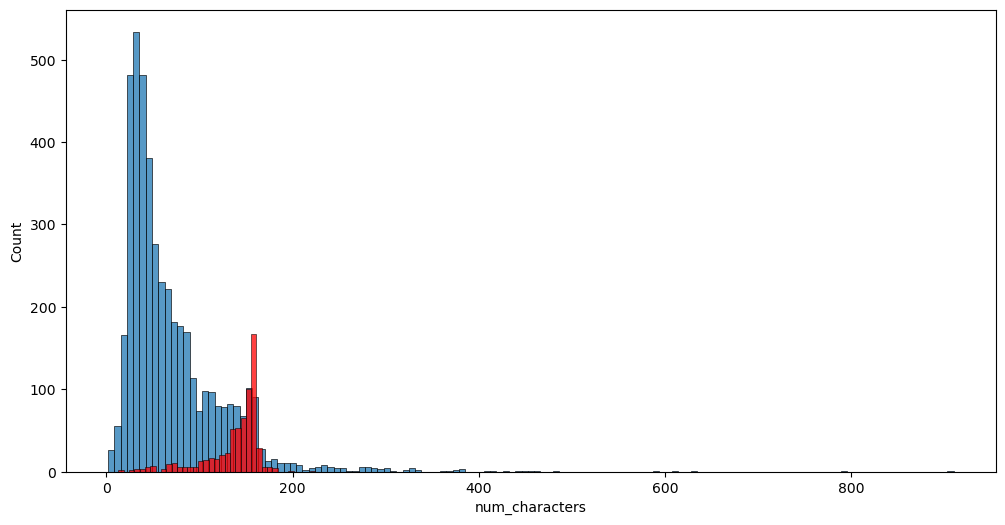

In [100]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

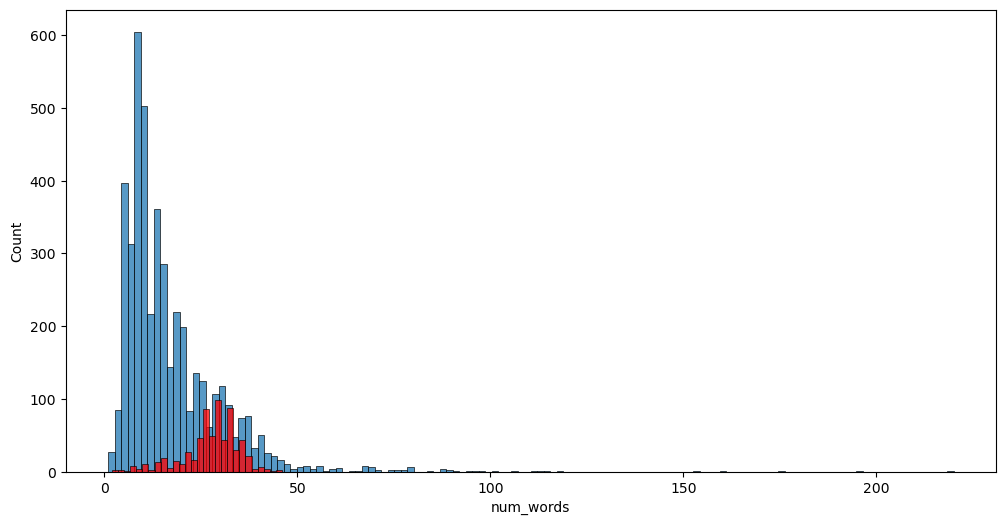

In [102]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

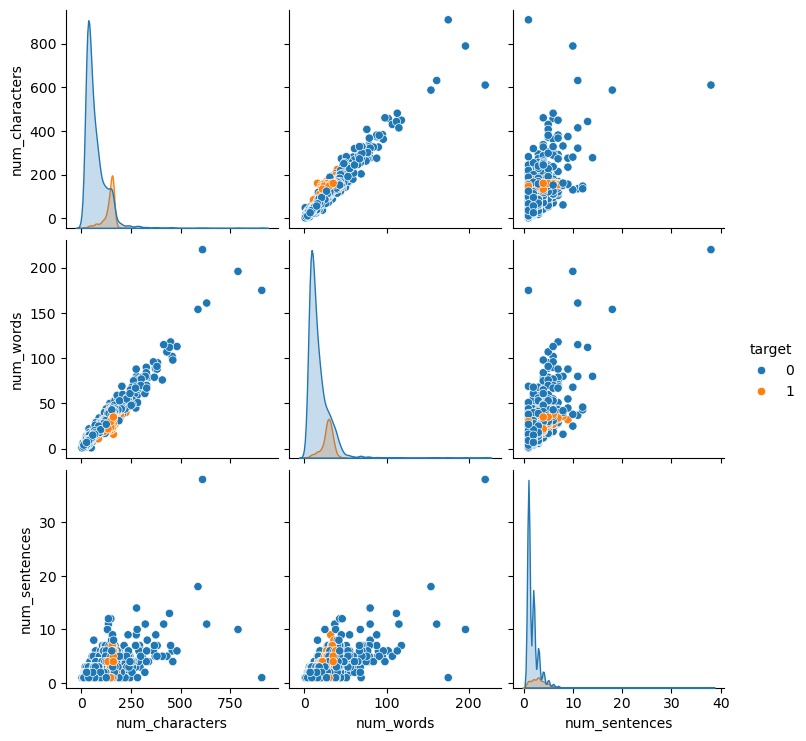

In [95]:
sns.pairplot(df, hue='target')

In [104]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# 3. Data Preprocessing

* Lower case
* Tokenization
* Remove Special Character
* Remove stop words and punctuaion
* Stemming

In [107]:
import nltk
import string
from nltk.corpus import stopwords


In [109]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [113]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
  
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [115]:
transform_text('Hi Shantanu, Did you like my presentation?')

'hi shantanu like present'

In [117]:
transform_text('Hi How Are You %% eg')

'hi eg'

In [119]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [121]:
df['transformed_text'] = df['text'].apply(transform_text)

In [123]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [125]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [127]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

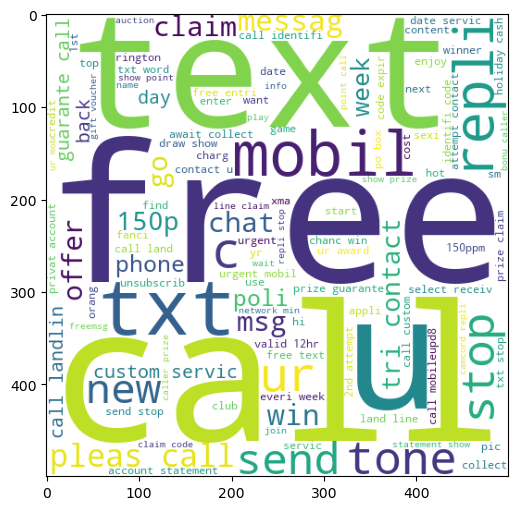

In [129]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [131]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

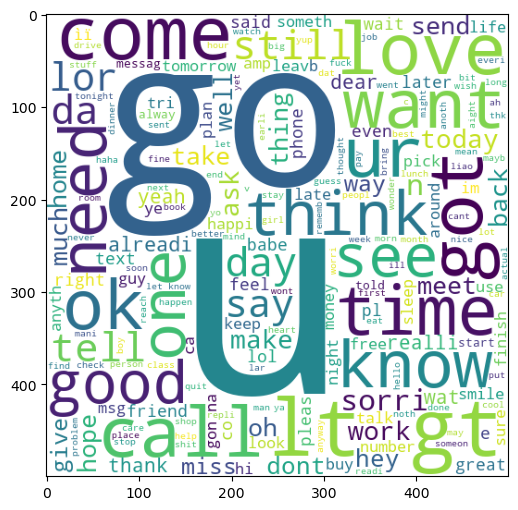

In [133]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [135]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [137]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [139]:
len(spam_corpus)

9939

In [149]:
word = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

In [155]:
count = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

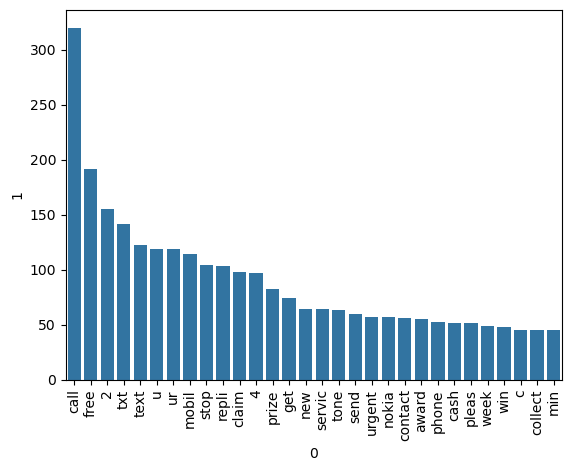

In [159]:
from collections import Counter
sns.barplot(x=word ,y=count, data=df)
plt.xticks(rotation='vertical')
plt.show()


In [165]:
ham_corpus = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [167]:
len(ham_corpus)

35404

In [173]:
word1 = pd.DataFrame(Counter(ham_corpus).most_common(30))[0]

In [175]:
count1 = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

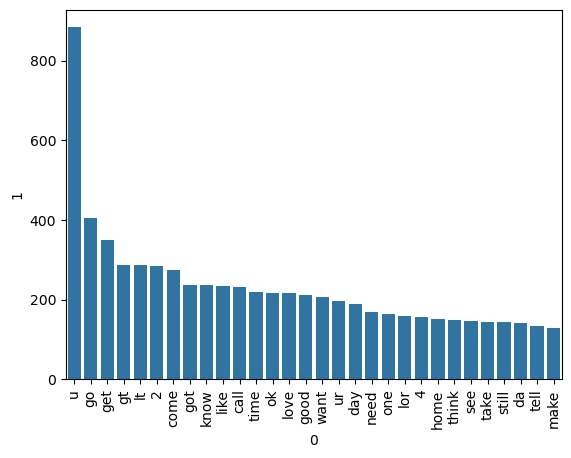

In [177]:
from collections import Counter
sns.barplot(x=word1 ,y=count1, data=df)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [180]:
# vectorization
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [182]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = cv.fit_transform 